In [1]:
# import
import pandas as  pd
import  numpy as  np
import  os
from pyspark.sql.functions import col, when,lit,udf
from pyspark.sql.types import StructType, StructField, StringType,IntegerType
import  warnings 
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt
%matplotlib inline

#import pymysql
import warnings
warnings.filterwarnings('ignore')
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Python Spark regression example").config("config.option", "value").getOrCreate()
sc = spark.sparkContext


Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/10/11 02:50:25 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/10/11 02:50:26 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [2]:
# load greenhouse.csv
greenhouse =spark.read.csv(path='./data/greenhouse.csv',encoding='UTF-8',comment=None, header=True,inferSchema=True)
greenhouse.show(20)

+---------+----+--------------+--------------------+
|  country|year|greengas_value|            category|
+---------+----+--------------+--------------------+
|Australia|2014|    393126.947|carbon_dioxide_co...|
|Australia|2013|   396913.9365|carbon_dioxide_co...|
|Australia|2012|   406462.8477|carbon_dioxide_co...|
|Australia|2011|   403705.5283|carbon_dioxide_co...|
|Australia|2010|   406200.9932|carbon_dioxide_co...|
|Australia|2009|    408448.479|carbon_dioxide_co...|
|Australia|2008|   404237.8282|carbon_dioxide_co...|
|Australia|2007|   398816.4535|carbon_dioxide_co...|
|Australia|2006|   391134.1009|carbon_dioxide_co...|
|Australia|2005|   385581.1328|carbon_dioxide_co...|
|Australia|2004|   381519.2616|carbon_dioxide_co...|
|Australia|2003|   368345.9774|carbon_dioxide_co...|
|Australia|2002|   361861.3879|carbon_dioxide_co...|
|Australia|2001|   357653.3299|carbon_dioxide_co...|
|Australia|2000|   349885.4331|carbon_dioxide_co...|
|Australia|1999|   343713.9069|carbon_dioxide_

In [3]:
type(greenhouse)

pyspark.sql.dataframe.DataFrame

In [4]:

print(greenhouse.dtypes)


[('country', 'string'), ('year', 'int'), ('greengas_value', 'double'), ('category', 'string')]


In [5]:

greenhouse.count()

8406

In [6]:
# load yd.csv
yd =spark.read.csv(path='./data/yd.csv',encoding='UTF-8',comment=None, header=True,inferSchema=True)
yd.show(20)

+-----------+------+------------+-----------+------------+-------+---------+-----+---------+----+-----+-----------+
|Domain Code|Domain|Country Code|    country|Element Code|Element|Item Code| Item|Year Code|year| Unit|Yield Value|
+-----------+------+------------+-----------+------------+-------+---------+-----+---------+----+-----+-----------+
|         QC| Crops|           2|Afghanistan|        5419|  Yield|       56|Maize|     1961|1961|hg/ha|      14000|
|         QC| Crops|           2|Afghanistan|        5419|  Yield|       56|Maize|     1962|1962|hg/ha|      14000|
|         QC| Crops|           2|Afghanistan|        5419|  Yield|       56|Maize|     1963|1963|hg/ha|      14260|
|         QC| Crops|           2|Afghanistan|        5419|  Yield|       56|Maize|     1964|1964|hg/ha|      14257|
|         QC| Crops|           2|Afghanistan|        5419|  Yield|       56|Maize|     1965|1965|hg/ha|      14400|
|         QC| Crops|           2|Afghanistan|        5419|  Yield|      

In [7]:
type(yd)

pyspark.sql.dataframe.DataFrame

In [8]:

print(yd.dtypes)


[('Domain Code', 'string'), ('Domain', 'string'), ('Country Code', 'int'), ('country', 'string'), ('Element Code', 'int'), ('Element', 'string'), ('Item Code', 'int'), ('Item', 'string'), ('Year Code', 'int'), ('year', 'int'), ('Unit', 'string'), ('Yield Value', 'int')]


In [9]:

yd.count()

56717

In [10]:
# load temp.csv
temp =spark.read.csv(path='./data/temp.csv',encoding='UTF-8',comment=None, header=True,inferSchema=True)
temp.show(20)

+----+--------------+--------+
|year|       country|avg_temp|
+----+--------------+--------+
|1849| cote d ivoire|   25.58|
|1850| cote d ivoire|   25.52|
|1851| cote d ivoire|   25.67|
|1852| cote d ivoire|    null|
|1853| cote d ivoire|    null|
|1854| cote d ivoire|    null|
|1855| cote d ivoire|    null|
|1856| cote d ivoire|   26.28|
|1857| cote d ivoire|   25.17|
|1858| cote d ivoire|   25.49|
|1859| cote d ivoire|   25.92|
|1860| cote d ivoire|   25.46|
|1861| cote d ivoire|   25.67|
|1862| cote d ivoire|   25.17|
|1863| cote d ivoire|    null|
|1864| cote d ivoire|    null|
|1865| cote d ivoire|    null|
|1866| cote d ivoire|    null|
|1867| cote d ivoire|    null|
|1868| cote d ivoire|    null|
+----+--------------+--------+
only showing top 20 rows



In [11]:
type(temp)

pyspark.sql.dataframe.DataFrame

In [12]:

print(temp.dtypes)

[('year', 'int'), ('country', 'string'), ('avg_temp', 'double')]


In [13]:

temp.count()

71311

In [14]:
# load rainfall.csv
rainfall =spark.read.csv(path='./data/rainfall.csv',encoding='UTF-8',comment=None, header=True,inferSchema=True)
rainfall.show(20)

+-----------+----+-----------------------------+
|    country|year|average_rain_fall_mm_per_year|
+-----------+----+-----------------------------+
|Afghanistan|1985|                          327|
|Afghanistan|1986|                          327|
|Afghanistan|1987|                          327|
|Afghanistan|1989|                          327|
|Afghanistan|1990|                          327|
|Afghanistan|1991|                          327|
|Afghanistan|1992|                          327|
|Afghanistan|1993|                          327|
|Afghanistan|1994|                          327|
|Afghanistan|1995|                          327|
|Afghanistan|1996|                          327|
|Afghanistan|1997|                          327|
|Afghanistan|1998|                          327|
|Afghanistan|1999|                          327|
|Afghanistan|2000|                          327|
|Afghanistan|2001|                          327|
|Afghanistan|2002|                          327|
|Afghanistan|2004|  

In [15]:
type(rainfall)

pyspark.sql.dataframe.DataFrame

In [16]:

print(rainfall.dtypes)

[('country', 'string'), ('year', 'int'), ('average_rain_fall_mm_per_year', 'string')]


In [17]:

rainfall.count()

6727

In [18]:
rainfall.printSchema()

root
 |-- country: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- average_rain_fall_mm_per_year: string (nullable = true)



In [19]:

yd.createOrReplaceTempView("ydtable")

In [20]:
Yield_Value=yd.select("Yield Value").collect()
Yield_Value

[Row(Yield Value=14000),
 Row(Yield Value=14000),
 Row(Yield Value=14260),
 Row(Yield Value=14257),
 Row(Yield Value=14400),
 Row(Yield Value=14400),
 Row(Yield Value=14144),
 Row(Yield Value=17064),
 Row(Yield Value=17177),
 Row(Yield Value=14757),
 Row(Yield Value=13400),
 Row(Yield Value=15652),
 Row(Yield Value=16170),
 Row(Yield Value=16170),
 Row(Yield Value=16116),
 Row(Yield Value=16598),
 Row(Yield Value=15833),
 Row(Yield Value=16183),
 Row(Yield Value=16102),
 Row(Yield Value=16711),
 Row(Yield Value=16690),
 Row(Yield Value=16658),
 Row(Yield Value=16641),
 Row(Yield Value=16612),
 Row(Yield Value=16652),
 Row(Yield Value=16875),
 Row(Yield Value=17020),
 Row(Yield Value=17034),
 Row(Yield Value=16963),
 Row(Yield Value=17582),
 Row(Yield Value=16800),
 Row(Yield Value=15000),
 Row(Yield Value=16786),
 Row(Yield Value=16667),
 Row(Yield Value=16563),
 Row(Yield Value=16364),
 Row(Yield Value=15000),
 Row(Yield Value=16500),
 Row(Yield Value=15000),
 Row(Yield Value=11979),


(array([4.4863e+04, 8.9430e+03, 2.1550e+03, 5.5100e+02, 1.9700e+02,
        7.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([      0.,  100000.,  200000.,  300000.,  400000.,  500000.,
         600000.,  700000.,  800000.,  900000., 1000000.]),
 <BarContainer object of 10 artists>)

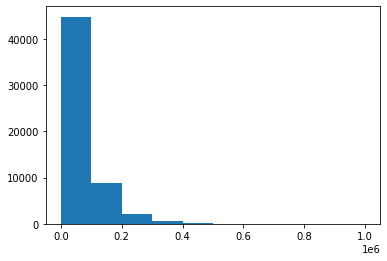

In [21]:
plt.hist(yd.toPandas()["Yield Value"])

In [22]:

yd.rdd.map(lambda row: (row['Domain Code'], sum([c == None for c in row]))).collect()


[('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('QC', 0),
 ('Q

In [23]:

import pyspark.sql.functions as fn

yd.agg(*[(1- (fn.count(c)/ fn.count('*'))).alias(c + ' missing') for c in yd.columns]).show()

+-------------------+--------------+--------------------+---------------+--------------------+---------------+-----------------+------------+-----------------+------------+------------+-------------------+
|Domain Code missing|Domain missing|Country Code missing|country missing|Element Code missing|Element missing|Item Code missing|Item missing|Year Code missing|year missing|Unit missing|Yield Value missing|
+-------------------+--------------+--------------------+---------------+--------------------+---------------+-----------------+------------+-----------------+------------+------------+-------------------+
|                0.0|           0.0|                 0.0|            0.0|                 0.0|            0.0|              0.0|         0.0|              0.0|         0.0|         0.0|                0.0|
+-------------------+--------------+--------------------+---------------+--------------------+---------------+-----------------+------------+-----------------+------------+----

In [24]:

temp.rdd.map(lambda row: (row['year'], sum([c == None for c in row]))).collect()

[(1849, 0),
 (1850, 0),
 (1851, 0),
 (1852, 1),
 (1853, 1),
 (1854, 1),
 (1855, 1),
 (1856, 0),
 (1857, 0),
 (1858, 0),
 (1859, 0),
 (1860, 0),
 (1861, 0),
 (1862, 0),
 (1863, 1),
 (1864, 1),
 (1865, 1),
 (1866, 1),
 (1867, 1),
 (1868, 1),
 (1869, 1),
 (1870, 1),
 (1871, 1),
 (1872, 1),
 (1873, 0),
 (1874, 0),
 (1875, 0),
 (1876, 0),
 (1877, 0),
 (1878, 0),
 (1879, 0),
 (1880, 0),
 (1881, 0),
 (1882, 0),
 (1883, 0),
 (1884, 0),
 (1885, 0),
 (1886, 0),
 (1887, 0),
 (1888, 0),
 (1889, 0),
 (1890, 0),
 (1891, 0),
 (1892, 0),
 (1893, 0),
 (1894, 0),
 (1895, 0),
 (1896, 0),
 (1897, 0),
 (1898, 0),
 (1899, 0),
 (1900, 0),
 (1901, 0),
 (1902, 0),
 (1903, 0),
 (1904, 0),
 (1905, 0),
 (1906, 0),
 (1907, 0),
 (1908, 0),
 (1909, 0),
 (1910, 0),
 (1911, 0),
 (1912, 0),
 (1913, 0),
 (1914, 0),
 (1915, 0),
 (1916, 0),
 (1917, 0),
 (1918, 0),
 (1919, 0),
 (1920, 0),
 (1921, 0),
 (1922, 0),
 (1923, 0),
 (1924, 0),
 (1925, 0),
 (1926, 0),
 (1927, 0),
 (1928, 0),
 (1929, 0),
 (1930, 0),
 (1931, 0),
 (19

In [25]:

import pyspark.sql.functions as fn

temp.agg(*[(1- (fn.count(c)/ fn.count('*'))).alias(c + ' missing') for c in temp.columns]).show()

+------------+---------------+--------------------+
|year missing|country missing|    avg_temp missing|
+------------+---------------+--------------------+
|         0.0|            0.0|0.035716789836070184|
+------------+---------------+--------------------+



In [26]:

temp=temp.fillna(0)
temp.show()

+----+--------------+--------+
|year|       country|avg_temp|
+----+--------------+--------+
|1849| cote d ivoire|   25.58|
|1850| cote d ivoire|   25.52|
|1851| cote d ivoire|   25.67|
|1852| cote d ivoire|     0.0|
|1853| cote d ivoire|     0.0|
|1854| cote d ivoire|     0.0|
|1855| cote d ivoire|     0.0|
|1856| cote d ivoire|   26.28|
|1857| cote d ivoire|   25.17|
|1858| cote d ivoire|   25.49|
|1859| cote d ivoire|   25.92|
|1860| cote d ivoire|   25.46|
|1861| cote d ivoire|   25.67|
|1862| cote d ivoire|   25.17|
|1863| cote d ivoire|     0.0|
|1864| cote d ivoire|     0.0|
|1865| cote d ivoire|     0.0|
|1866| cote d ivoire|     0.0|
|1867| cote d ivoire|     0.0|
|1868| cote d ivoire|     0.0|
+----+--------------+--------+
only showing top 20 rows



In [27]:

temp.agg(*[(1- (fn.count(c)/ fn.count('*'))).alias(c + ' missing') for c in temp.columns]).show()

+------------+---------------+----------------+
|year missing|country missing|avg_temp missing|
+------------+---------------+----------------+
|         0.0|            0.0|             0.0|
+------------+---------------+----------------+



In [28]:


rainfall.rdd.map(lambda row: (row['country'], sum([c == None for c in row]))).collect()

[('Afghanistan', 0),
 ('Afghanistan', 0),
 ('Afghanistan', 0),
 ('Afghanistan', 0),
 ('Afghanistan', 0),
 ('Afghanistan', 0),
 ('Afghanistan', 0),
 ('Afghanistan', 0),
 ('Afghanistan', 0),
 ('Afghanistan', 0),
 ('Afghanistan', 0),
 ('Afghanistan', 0),
 ('Afghanistan', 0),
 ('Afghanistan', 0),
 ('Afghanistan', 0),
 ('Afghanistan', 0),
 ('Afghanistan', 0),
 ('Afghanistan', 0),
 ('Afghanistan', 0),
 ('Afghanistan', 0),
 ('Afghanistan', 0),
 ('Afghanistan', 0),
 ('Afghanistan', 0),
 ('Afghanistan', 0),
 ('Afghanistan', 0),
 ('Afghanistan', 0),
 ('Afghanistan', 0),
 ('Afghanistan', 0),
 ('Afghanistan', 0),
 ('Afghanistan', 0),
 ('Afghanistan', 0),
 ('Albania', 0),
 ('Albania', 0),
 ('Albania', 0),
 ('Albania', 0),
 ('Albania', 0),
 ('Albania', 0),
 ('Albania', 0),
 ('Albania', 0),
 ('Albania', 0),
 ('Albania', 0),
 ('Albania', 0),
 ('Albania', 0),
 ('Albania', 0),
 ('Albania', 0),
 ('Albania', 0),
 ('Albania', 0),
 ('Albania', 0),
 ('Albania', 0),
 ('Albania', 0),
 ('Albania', 0),
 ('Albani

In [29]:
import pyspark.sql.functions as fn

rainfall.agg(*[(1- (fn.count(c)/ fn.count('*'))).alias(c + ' missing') for c in rainfall.columns]).show()

+---------------+------------+-------------------------------------+
|country missing|year missing|average_rain_fall_mm_per_year missing|
+---------------+------------+-------------------------------------+
|            0.0|         0.0|                  0.11580199197264751|
+---------------+------------+-------------------------------------+



In [30]:

rainfall=rainfall.fillna(int("0"))
rainfall.show(1000)


+--------------------+----+-----------------------------+
|             country|year|average_rain_fall_mm_per_year|
+--------------------+----+-----------------------------+
|         Afghanistan|1985|                          327|
|         Afghanistan|1986|                          327|
|         Afghanistan|1987|                          327|
|         Afghanistan|1989|                          327|
|         Afghanistan|1990|                          327|
|         Afghanistan|1991|                          327|
|         Afghanistan|1992|                          327|
|         Afghanistan|1993|                          327|
|         Afghanistan|1994|                          327|
|         Afghanistan|1995|                          327|
|         Afghanistan|1996|                          327|
|         Afghanistan|1997|                          327|
|         Afghanistan|1998|                          327|
|         Afghanistan|1999|                          327|
|         Afgh

In [31]:

import pyspark.sql.functions as fn

rainfall.agg(*[(1- (fn.count(c)/ fn.count('*'))).alias(c + ' missing') for c in rainfall.columns]).show()

+---------------+------------+-------------------------------------+
|country missing|year missing|average_rain_fall_mm_per_year missing|
+---------------+------------+-------------------------------------+
|            0.0|         0.0|                  0.11580199197264751|
+---------------+------------+-------------------------------------+



In [32]:

greenhouse.rdd.map(lambda row: (row['country'], sum([c == None for c in row]))).collect()

[('Australia', 0),
 ('Australia', 0),
 ('Australia', 0),
 ('Australia', 0),
 ('Australia', 0),
 ('Australia', 0),
 ('Australia', 0),
 ('Australia', 0),
 ('Australia', 0),
 ('Australia', 0),
 ('Australia', 0),
 ('Australia', 0),
 ('Australia', 0),
 ('Australia', 0),
 ('Australia', 0),
 ('Australia', 0),
 ('Australia', 0),
 ('Australia', 0),
 ('Australia', 0),
 ('Australia', 0),
 ('Australia', 0),
 ('Australia', 0),
 ('Australia', 0),
 ('Australia', 0),
 ('Australia', 0),
 ('Austria', 0),
 ('Austria', 0),
 ('Austria', 0),
 ('Austria', 0),
 ('Austria', 0),
 ('Austria', 0),
 ('Austria', 0),
 ('Austria', 0),
 ('Austria', 0),
 ('Austria', 0),
 ('Austria', 0),
 ('Austria', 0),
 ('Austria', 0),
 ('Austria', 0),
 ('Austria', 0),
 ('Austria', 0),
 ('Austria', 0),
 ('Austria', 0),
 ('Austria', 0),
 ('Austria', 0),
 ('Austria', 0),
 ('Austria', 0),
 ('Austria', 0),
 ('Austria', 0),
 ('Austria', 0),
 ('Belarus', 0),
 ('Belarus', 0),
 ('Belarus', 0),
 ('Belarus', 0),
 ('Belarus', 0),
 ('Belarus', 0)

In [33]:

import pyspark.sql.functions as fn

greenhouse.agg(*[(1- (fn.count(c)/ fn.count('*'))).alias(c + ' missing') for c in greenhouse.columns]).show()

+---------------+------------+----------------------+----------------+
|country missing|year missing|greengas_value missing|category missing|
+---------------+------------+----------------------+----------------+
|            0.0|         0.0|                   0.0|             0.0|
+---------------+------------+----------------------+----------------+



1.greenhouse数据预处理

In [34]:

greenhouse.createOrReplaceTempView("greenhouseTable")

In [35]:
from pyspark.sql.functions import concat
greenhouse_new=greenhouse.withColumn('key1', concat(greenhouse.country,greenhouse.year))
greenhouse_new.show()

+---------+----+--------------+--------------------+-------------+
|  country|year|greengas_value|            category|         key1|
+---------+----+--------------+--------------------+-------------+
|Australia|2014|    393126.947|carbon_dioxide_co...|Australia2014|
|Australia|2013|   396913.9365|carbon_dioxide_co...|Australia2013|
|Australia|2012|   406462.8477|carbon_dioxide_co...|Australia2012|
|Australia|2011|   403705.5283|carbon_dioxide_co...|Australia2011|
|Australia|2010|   406200.9932|carbon_dioxide_co...|Australia2010|
|Australia|2009|    408448.479|carbon_dioxide_co...|Australia2009|
|Australia|2008|   404237.8282|carbon_dioxide_co...|Australia2008|
|Australia|2007|   398816.4535|carbon_dioxide_co...|Australia2007|
|Australia|2006|   391134.1009|carbon_dioxide_co...|Australia2006|
|Australia|2005|   385581.1328|carbon_dioxide_co...|Australia2005|
|Australia|2004|   381519.2616|carbon_dioxide_co...|Australia2004|
|Australia|2003|   368345.9774|carbon_dioxide_co...|Australia2

In [36]:

greenhouse_new.dropDuplicates().count()

8406

In [37]:
dict_gh={ i:'type'+ str(j+1)  for j,i  in enumerate(set(greenhouse_new.select("category").collect())) }
dict_gh

{Row(category='hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent'): 'type1',
 Row(category='perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent'): 'type2',
 Row(category='greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent'): 'type3',
 Row(category='nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent'): 'type4',
 Row(category='unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent'): 'type5',
 Row(category='methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent'): 'type6',
 Row(category='nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent'): 'type7',
 Row(category='greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent'): 'type8',
 Row(category='sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equiva

In [38]:
for key in dict_gh:
    keya=str(key).split("=")[1].split(")")[0]
    if  keya:
        print(dict_gh[key])
    

type1
type2
type3
type4
type5
type6
type7
type8
type9
type10


In [39]:
def fc(a):
    if a=="carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent":
        return "type1"
    elif a=="greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent":
        return "type2"
    elif a=="methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent":
        return "type3"
    elif a=="nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent":
        return "type4"
    elif a=="sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent":
        return "type5"
    elif a=="hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent":
        return "type6"
    elif a=="greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent":
        return "type7"
    elif a=="perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent":
        return "type8"
    elif a=="nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent":
        return "type9"
    else:
        return "type10"

fc = udf(fc, StringType())
greenhouse_new = greenhouse_new.withColumn('category_new', fc('category'))
greenhouse_new.show(10000)

+--------------------+----+--------------+--------------------+--------------------+------------+
|             country|year|greengas_value|            category|                key1|category_new|
+--------------------+----+--------------+--------------------+--------------------+------------+
|           Australia|2014|    393126.947|carbon_dioxide_co...|       Australia2014|       type1|
|           Australia|2013|   396913.9365|carbon_dioxide_co...|       Australia2013|       type1|
|           Australia|2012|   406462.8477|carbon_dioxide_co...|       Australia2012|       type1|
|           Australia|2011|   403705.5283|carbon_dioxide_co...|       Australia2011|       type1|
|           Australia|2010|   406200.9932|carbon_dioxide_co...|       Australia2010|       type1|
|           Australia|2009|    408448.479|carbon_dioxide_co...|       Australia2009|       type1|
|           Australia|2008|   404237.8282|carbon_dioxide_co...|       Australia2008|       type1|
|           Australi

In [40]:
gh=greenhouse_new.toPandas().pivot_table(values='greengas_value',columns=['category_new'],index=['key1'])
gh.reset_index(inplace=True)  
gh

category_new,key1,type1,type10,type2,type3,type4,type5,type6,type7,type8,type9
0,Australia1990,2.782659e+05,NaN,4.186230e+05,118768.8378,15345.59786,211.018511,1424.683520,4.186230e+05,4607.012919,NaN
1,Australia1991,2.797416e+05,NaN,4.186741e+05,117744.6418,14923.40502,228.944834,1424.683520,4.186741e+05,4610.743294,NaN
2,Australia1992,2.847661e+05,NaN,4.230801e+05,116837.5067,15293.18335,246.858849,1333.184000,4.230801e+05,4603.282544,NaN
3,Australia1993,2.891423e+05,NaN,4.237649e+05,113837.5119,15374.99343,264.759156,1829.872000,4.237649e+05,3315.528376,NaN
4,Australia1994,2.938307e+05,NaN,4.240930e+05,110997.4102,15790.42685,282.640896,1027.343549,4.240930e+05,2164.428749,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1069,United States of America2010,5.688756e+06,7762.137206,6.985457e+06,722410.5661,410314.23950,9481.913470,141633.797800,6.985457e+06,4536.224066,562.170248
1070,United States of America2011,5.559508e+06,8178.469763,6.865398e+06,717423.6902,416521.77920,9990.145376,146080.595700,6.865398e+06,7026.626659,668.931661
1071,United States of America2012,5.349221e+06,8584.424258,6.643011e+06,714401.1725,409285.58380,7581.757048,147249.750900,6.643011e+06,6054.952494,631.990312
1072,United States of America2013,5.502551e+06,8993.807245,6.799979e+06,721475.0556,403349.74670,7229.068816,149922.393800,6.799979e+06,5858.174564,600.342163


In [41]:
gh['key1'].count()   

1074

②rainfall

In [42]:
rainfall.show()

+-----------+----+-----------------------------+
|    country|year|average_rain_fall_mm_per_year|
+-----------+----+-----------------------------+
|Afghanistan|1985|                          327|
|Afghanistan|1986|                          327|
|Afghanistan|1987|                          327|
|Afghanistan|1989|                          327|
|Afghanistan|1990|                          327|
|Afghanistan|1991|                          327|
|Afghanistan|1992|                          327|
|Afghanistan|1993|                          327|
|Afghanistan|1994|                          327|
|Afghanistan|1995|                          327|
|Afghanistan|1996|                          327|
|Afghanistan|1997|                          327|
|Afghanistan|1998|                          327|
|Afghanistan|1999|                          327|
|Afghanistan|2000|                          327|
|Afghanistan|2001|                          327|
|Afghanistan|2002|                          327|
|Afghanistan|2004|  

In [43]:
from pyspark.sql.functions import concat
rainfall_new=rainfall.withColumn('key2', concat(rainfall.country,rainfall.year))
rainfall_new.show()

+-----------+----+-----------------------------+---------------+
|    country|year|average_rain_fall_mm_per_year|           key2|
+-----------+----+-----------------------------+---------------+
|Afghanistan|1985|                          327|Afghanistan1985|
|Afghanistan|1986|                          327|Afghanistan1986|
|Afghanistan|1987|                          327|Afghanistan1987|
|Afghanistan|1989|                          327|Afghanistan1989|
|Afghanistan|1990|                          327|Afghanistan1990|
|Afghanistan|1991|                          327|Afghanistan1991|
|Afghanistan|1992|                          327|Afghanistan1992|
|Afghanistan|1993|                          327|Afghanistan1993|
|Afghanistan|1994|                          327|Afghanistan1994|
|Afghanistan|1995|                          327|Afghanistan1995|
|Afghanistan|1996|                          327|Afghanistan1996|
|Afghanistan|1997|                          327|Afghanistan1997|
|Afghanistan|1998|       

In [44]:


print('data volume [before] full field de-duplication {}'.format(int(rainfall_new.count())))
rainfall_new=rainfall_new.distinct()
print('data volume [after] full field de-duplication {}'.format(int(rainfall_new.count())))

data volume [before] full field de-duplication 6727
data volume [after] full field de-duplication 6727


In [45]:
temp.show()

+----+--------------+--------+
|year|       country|avg_temp|
+----+--------------+--------+
|1849| cote d ivoire|   25.58|
|1850| cote d ivoire|   25.52|
|1851| cote d ivoire|   25.67|
|1852| cote d ivoire|     0.0|
|1853| cote d ivoire|     0.0|
|1854| cote d ivoire|     0.0|
|1855| cote d ivoire|     0.0|
|1856| cote d ivoire|   26.28|
|1857| cote d ivoire|   25.17|
|1858| cote d ivoire|   25.49|
|1859| cote d ivoire|   25.92|
|1860| cote d ivoire|   25.46|
|1861| cote d ivoire|   25.67|
|1862| cote d ivoire|   25.17|
|1863| cote d ivoire|     0.0|
|1864| cote d ivoire|     0.0|
|1865| cote d ivoire|     0.0|
|1866| cote d ivoire|     0.0|
|1867| cote d ivoire|     0.0|
|1868| cote d ivoire|     0.0|
+----+--------------+--------+
only showing top 20 rows



In [46]:
from pyspark.sql.functions import concat
temp_new=temp.withColumn('key3', concat(temp.country,temp.year))
temp_new.show()

+----+--------------+--------+------------------+
|year|       country|avg_temp|              key3|
+----+--------------+--------+------------------+
|1849| cote d ivoire|   25.58| cote d ivoire1849|
|1850| cote d ivoire|   25.52| cote d ivoire1850|
|1851| cote d ivoire|   25.67| cote d ivoire1851|
|1852| cote d ivoire|     0.0| cote d ivoire1852|
|1853| cote d ivoire|     0.0| cote d ivoire1853|
|1854| cote d ivoire|     0.0| cote d ivoire1854|
|1855| cote d ivoire|     0.0| cote d ivoire1855|
|1856| cote d ivoire|   26.28| cote d ivoire1856|
|1857| cote d ivoire|   25.17| cote d ivoire1857|
|1858| cote d ivoire|   25.49| cote d ivoire1858|
|1859| cote d ivoire|   25.92| cote d ivoire1859|
|1860| cote d ivoire|   25.46| cote d ivoire1860|
|1861| cote d ivoire|   25.67| cote d ivoire1861|
|1862| cote d ivoire|   25.17| cote d ivoire1862|
|1863| cote d ivoire|     0.0| cote d ivoire1863|
|1864| cote d ivoire|     0.0| cote d ivoire1864|
|1865| cote d ivoire|     0.0| cote d ivoire1865|


In [47]:


print('data volume [before] full field de-duplication {}'.format(int(temp_new.count())))

temp_new=temp_new.distinct()
temp_new.count()
print('data volume [after] full field de-duplication {}'.format(int(temp_new.count())))

data volume [before] full field de-duplication 71311
data volume [after] full field de-duplication 64361


In [48]:

temp_new_1=temp_new.toPandas().drop_duplicates(subset='key3', keep='first', inplace= False)
temp_new_1

,year,country,avg_temp,key3
0,1916,Nigeria,25.92,Nigeria1916
1,1852,Turkey,18.51,Turkey1852
2,1972,Turkey,18.38,Turkey1972
3,1894,India,24.89,India1894
4,1802,India,27.01,India1802
...,...,...,...,...
64341,1882,Tunisia,18.02,Tunisia1882
64343,1892,Mongolia,-4.54,Mongolia1892
64348,1894,Austria,7.99,Austria1894
64349,1939,Austria,8.49,Austria1939


④yeild 数据预处理

In [49]:
yd.show()

+-----------+------+------------+-----------+------------+-------+---------+-----+---------+----+-----+-----------+
|Domain Code|Domain|Country Code|    country|Element Code|Element|Item Code| Item|Year Code|year| Unit|Yield Value|
+-----------+------+------------+-----------+------------+-------+---------+-----+---------+----+-----+-----------+
|         QC| Crops|           2|Afghanistan|        5419|  Yield|       56|Maize|     1961|1961|hg/ha|      14000|
|         QC| Crops|           2|Afghanistan|        5419|  Yield|       56|Maize|     1962|1962|hg/ha|      14000|
|         QC| Crops|           2|Afghanistan|        5419|  Yield|       56|Maize|     1963|1963|hg/ha|      14260|
|         QC| Crops|           2|Afghanistan|        5419|  Yield|       56|Maize|     1964|1964|hg/ha|      14257|
|         QC| Crops|           2|Afghanistan|        5419|  Yield|       56|Maize|     1965|1965|hg/ha|      14400|
|         QC| Crops|           2|Afghanistan|        5419|  Yield|      

In [50]:
from pyspark.sql.functions import concat
yd_new=yd.withColumn('key4', concat(yd.country,yd.year))
yd_new.show()

+-----------+------+------------+-----------+------------+-------+---------+-----+---------+----+-----+-----------+---------------+
|Domain Code|Domain|Country Code|    country|Element Code|Element|Item Code| Item|Year Code|year| Unit|Yield Value|           key4|
+-----------+------+------------+-----------+------------+-------+---------+-----+---------+----+-----+-----------+---------------+
|         QC| Crops|           2|Afghanistan|        5419|  Yield|       56|Maize|     1961|1961|hg/ha|      14000|Afghanistan1961|
|         QC| Crops|           2|Afghanistan|        5419|  Yield|       56|Maize|     1962|1962|hg/ha|      14000|Afghanistan1962|
|         QC| Crops|           2|Afghanistan|        5419|  Yield|       56|Maize|     1963|1963|hg/ha|      14260|Afghanistan1963|
|         QC| Crops|           2|Afghanistan|        5419|  Yield|       56|Maize|     1964|1964|hg/ha|      14257|Afghanistan1964|
|         QC| Crops|           2|Afghanistan|        5419|  Yield|       56|

In [51]:

print('data volume [before] full field de-duplication {}'.format(int(yd_new.count())))
yd_new=yd_new.dropDuplicates()
yd_new.count()
print('data volume [after] full field de-duplication {}'.format(int(yd_new.count())))

data volume [before] full field de-duplication 56717
data volume [after] full field de-duplication 56717


In [52]:
yd_clm= list(yd_new.columns)  
yd_clm.remove('Item Code')    
yd_clm.remove('Item')    
yd_clm.remove('Yield Value') 

In [53]:
yd_clm

['Domain Code',
 'Domain',
 'Country Code',
 'country',
 'Element Code',
 'Element',
 'Year Code',
 'year',
 'Unit',
 'key4']

In [54]:
yd_new1=yd_new.toPandas().pivot_table(index=yd_clm,aggfunc='mean',values='Yield Value').reset_index()
yd_new1

,Domain Code,Domain,Country Code,country,Element Code,Element,Year Code,year,Unit,key4,Yield Value
0,QC,Crops,1,Armenia,5419,Yield,1992,1992,hg/ha,Armenia1992,55081.666667
1,QC,Crops,1,Armenia,5419,Yield,1993,1993,hg/ha,Armenia1993,62978.000000
2,QC,Crops,1,Armenia,5419,Yield,1994,1994,hg/ha,Armenia1994,60568.000000
3,QC,Crops,1,Armenia,5419,Yield,1995,1995,hg/ha,Armenia1995,58312.333333
4,QC,Crops,1,Armenia,5419,Yield,1996,1996,hg/ha,Armenia1996,58478.000000
...,...,...,...,...,...,...,...,...,...,...,...
10567,QC,Crops,351,China,5419,Yield,2012,2012,hg/ha,China2012,97304.625000
10568,QC,Crops,351,China,5419,Yield,2013,2013,hg/ha,China2013,98448.375000
10569,QC,Crops,351,China,5419,Yield,2014,2014,hg/ha,China2014,98713.625000
10570,QC,Crops,351,China,5419,Yield,2015,2015,hg/ha,China2015,99832.625000


In [55]:
print('\n data volume of gh is {}\n data volume of rainfall_new is {}\n data volume of temp_new_1 is {}\n data volume of yd_new1 is {}'.
      format(gh.count(),rainfall_new.count(),temp_new_1.count(),yd_new1.count()))


 data volume of gh is category_new
key1      1074
type1     1074
type10      75
type2     1074
type3     1074
type4     1074
type5     1032
type6      975
type7      949
type8      831
type9      248
dtype: int64
 data volume of rainfall_new is 6727
 data volume of temp_new_1 is year        28679
country     28679
avg_temp    28679
key3        28679
dtype: int64
 data volume of yd_new1 is Domain Code     10572
Domain          10572
Country Code    10572
country         10572
Element Code    10572
Element         10572
Year Code       10572
year            10572
Unit            10572
key4            10572
Yield Value     10572
dtype: int64


In [56]:
data_tep1=pd.merge(yd_new1, temp_new_1, how='left', on=None, left_on='key4', right_on='key3',
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

print('data volume after merge is {}'.format(len(data_tep1)))

data volume after merge is 10572


In [57]:
data_tep2=pd.merge(data_tep1,rainfall_new.toPandas(), how='left', on=None, left_on='key4', right_on='key2',
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

print('data volume after merge is {}'.format(len(data_tep2)))

data volume after merge is 10572


In [58]:
data_tep3=pd.merge(data_tep2,gh, how='left', on=None, left_on='key4', right_on='key1',
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

print('data volume after merge is {}'.format(len(data_tep3)))

data volume after merge is 10572


In [59]:
data_tep3.head()

,Domain Code,Domain,Country Code,country_x,Element Code,Element,Year Code,year_x,Unit,key4,...,type1,type10,type2,type3,type4,type5,type6,type7,type8,type9
0,QC,Crops,107,cote d ivoire,5419,Yield,1961,1961,hg/ha,cote d ivoire1961,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,QC,Crops,107,cote d ivoire,5419,Yield,1962,1962,hg/ha,cote d ivoire1962,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,QC,Crops,107,cote d ivoire,5419,Yield,1963,1963,hg/ha,cote d ivoire1963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,QC,Crops,107,cote d ivoire,5419,Yield,1964,1964,hg/ha,cote d ivoire1964,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,QC,Crops,107,cote d ivoire,5419,Yield,1965,1965,hg/ha,cote d ivoire1965,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
data_tep3_clm=data_tep3.columns
data_tep3_clm

Index(['Domain Code', 'Domain', 'Country Code', 'country_x', 'Element Code',
       'Element', 'Year Code', 'year_x', 'Unit', 'key4', 'Yield Value',
       'year_y', 'country_y', 'avg_temp', 'key3', 'country', 'year',
       'average_rain_fall_mm_per_year', 'key2', 'key1', 'type1', 'type10',
       'type2', 'type3', 'type4', 'type5', 'type6', 'type7', 'type8', 'type9'],
      dtype='object')

In [61]:
data_tep4_clm=['Domain Code', 'Domain',  'Yield Value',
        'avg_temp',  'average_rain_fall_mm_per_year',  'key4', 'type1', 'type10',
       'type2', 'type3', 'type4', 'type5', 'type6', 'type7', 'type8', 'type9']

In [62]:
data_tep4=data_tep3[data_tep4_clm]

In [63]:
data_tep4.tail()  

,Domain Code,Domain,Yield Value,avg_temp,average_rain_fall_mm_per_year,key4,type1,type10,type2,type3,type4,type5,type6,type7,type8,type9
10567,QC,Crops,39170.75,20.52,657,Zimbabwe2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10568,QC,Crops,37882.75,19.76,657,Zimbabwe2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10569,QC,Crops,38196.25,NaN,657,Zimbabwe2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10570,QC,Crops,37217.75,NaN,657,Zimbabwe2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10571,QC,Crops,37683.00,NaN,657,Zimbabwe2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
data_tep4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10572 entries, 0 to 10571
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Domain Code                    10572 non-null  object 
 1   Domain                         10572 non-null  object 
 2   Yield Value                    10572 non-null  float64
 3   avg_temp                       5633 non-null   float64
 4   average_rain_fall_mm_per_year  4602 non-null   object 
 5   key4                           10572 non-null  object 
 6   type1                          936 non-null    float64
 7   type10                         50 non-null     float64
 8   type2                          936 non-null    float64
 9   type3                          936 non-null    float64
 10  type4                          936 non-null    float64
 11  type5                          910 non-null    float64
 12  type6                          861 non-null   

In [65]:
print(data_tep4.dtypes)

Domain Code                       object
Domain                            object
Yield Value                      float64
avg_temp                         float64
average_rain_fall_mm_per_year     object
key4                              object
type1                            float64
type10                           float64
type2                            float64
type3                            float64
type4                            float64
type5                            float64
type6                            float64
type7                            float64
type8                            float64
type9                            float64
dtype: object


In [66]:
data_tep4 = data_tep4.astype({'average_rain_fall_mm_per_year':'float64'})

In [67]:
print(data_tep4.dtypes)

Domain Code                       object
Domain                            object
Yield Value                      float64
avg_temp                         float64
average_rain_fall_mm_per_year    float64
key4                              object
type1                            float64
type10                           float64
type2                            float64
type3                            float64
type4                            float64
type5                            float64
type6                            float64
type7                            float64
type8                            float64
type9                            float64
dtype: object


In [68]:
data_tep4.drop(axis=1,columns=['type10','type9'],inplace=True)
data_tep4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10572 entries, 0 to 10571
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Domain Code                    10572 non-null  object 
 1   Domain                         10572 non-null  object 
 2   Yield Value                    10572 non-null  float64
 3   avg_temp                       5633 non-null   float64
 4   average_rain_fall_mm_per_year  4602 non-null   float64
 5   key4                           10572 non-null  object 
 6   type1                          936 non-null    float64
 7   type2                          936 non-null    float64
 8   type3                          936 non-null    float64
 9   type4                          936 non-null    float64
 10  type5                          910 non-null    float64
 11  type6                          861 non-null    float64
 12  type7                          846 non-null   

In [69]:
values = data_tep4.values.tolist()
columns = data_tep4.columns.tolist()
data_tep4_a = spark.createDataFrame(values, columns)
data_tep4_a.show()
data_tep4_a=data_tep4_a.fillna(int("0"))
import pyspark.sql.functions as fn
data_tep4_a.agg(*[(1- (fn.count(c)/ fn.count('*'))).alias(c + ' missing') for c in data_tep4_a.columns]).show()


+-----------+------+------------------+--------+-----------------------------+------------------+-----+-----+-----+-----+-----+-----+-----+-----+
|Domain Code|Domain|       Yield Value|avg_temp|average_rain_fall_mm_per_year|              key4|type1|type2|type3|type4|type5|type6|type7|type8|
+-----------+------+------------------+--------+-----------------------------+------------------+-----+-----+-----+-----+-----+-----+-----+-----+
|         QC| Crops|22968.571428571428|   26.25|                          NaN| cote d ivoire1961|  NaN|  NaN|  NaN|  NaN|  NaN|  NaN|  NaN|  NaN|
|         QC| Crops| 23632.14285714286|   26.19|                          NaN| cote d ivoire1962|  NaN|  NaN|  NaN|  NaN|  NaN|  NaN|  NaN|  NaN|
|         QC| Crops|           22517.0|   26.55|                          NaN| cote d ivoire1963|  NaN|  NaN|  NaN|  NaN|  NaN|  NaN|  NaN|  NaN|
|         QC| Crops|22665.714285714286|   25.96|                          NaN| cote d ivoire1964|  NaN|  NaN|  NaN|  NaN|  N

In [70]:
data_tep4.dropna(axis=0,how='any',inplace=True)   

In [71]:
dd=data_tep4
dd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496 entries, 502 to 9851
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Domain Code                    496 non-null    object 
 1   Domain                         496 non-null    object 
 2   Yield Value                    496 non-null    float64
 3   avg_temp                       496 non-null    float64
 4   average_rain_fall_mm_per_year  496 non-null    float64
 5   key4                           496 non-null    object 
 6   type1                          496 non-null    float64
 7   type2                          496 non-null    float64
 8   type3                          496 non-null    float64
 9   type4                          496 non-null    float64
 10  type5                          496 non-null    float64
 11  type6                          496 non-null    float64
 12  type7                          496 non-null    

In [72]:
dd.tail()

,Domain Code,Domain,Yield Value,avg_temp,average_rain_fall_mm_per_year,key4,type1,type2,type3,type4,type5,type6,type7,type8
9847,QC,Crops,45492.666667,7.88,565.0,Ukraine2006,325586.6220,452089.7628,100145.05240,25843.83396,4.273998,398.821407,452089.7628,111.158986
9848,QC,Crops,45417.333333,9.46,565.0,Ukraine2007,330087.2508,455267.4446,99448.15059,25013.69110,5.198209,558.442175,455267.4446,154.711685
9849,QC,Crops,51494.500000,9.24,565.0,Ukraine2008,317063.8437,442172.3752,94169.69931,30113.67143,9.338079,641.582142,442172.3752,174.240462
9850,QC,Crops,52798.166667,8.82,565.0,Ukraine2009,269598.4218,384651.7878,87087.76926,27242.47651,9.365649,659.805110,384651.7878,53.949494
9851,QC,Crops,48759.500000,8.97,565.0,Ukraine2010,287113.6064,401929.0933,86107.83012,27932.30221,9.710033,738.977291,401929.0933,26.667307


In [73]:
dd['Domain'].value_counts()

Crops    496
Name: Domain, dtype: int64

In [74]:
dd['Domain Code'].value_counts()

QC    496
Name: Domain Code, dtype: int64

In [75]:
dd['Domain']=1   #     Domain and Domain Code are both fixed values, converted to numbers in one-hot form
dd['Domain Code']=1

In [76]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496 entries, 502 to 9851
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Domain Code                    496 non-null    int64  
 1   Domain                         496 non-null    int64  
 2   Yield Value                    496 non-null    float64
 3   avg_temp                       496 non-null    float64
 4   average_rain_fall_mm_per_year  496 non-null    float64
 5   key4                           496 non-null    object 
 6   type1                          496 non-null    float64
 7   type2                          496 non-null    float64
 8   type3                          496 non-null    float64
 9   type4                          496 non-null    float64
 10  type5                          496 non-null    float64
 11  type6                          496 non-null    float64
 12  type7                          496 non-null    

In [77]:
values = dd.values.tolist()
columns = dd.columns.tolist()
dd_a = spark.createDataFrame(values, columns)
dd_a.show()
dd_a=dd_a.fillna(int("0"))
#rainfall.show(1000)
import pyspark.sql.functions as fn

dd_a.agg(*[(1- (fn.count(c)/ fn.count('*'))).alias(c + ' missing') for c in dd_a.columns]).show()

+-----------+------+------------------+--------+-----------------------------+-------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
|Domain Code|Domain|       Yield Value|avg_temp|average_rain_fall_mm_per_year|         key4|      type1|      type2|      type3|      type4|      type5|      type6|      type7|      type8|
+-----------+------+------------------+--------+-----------------------------+-------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
|          1|     1| 87676.85714285714|    16.8|                        534.0|Australia1990|278265.8989|418623.0496|118768.8378|15345.59786|211.0185114| 1424.68352|418623.0496|4607.012919|
|          1|     1| 87854.28571428571|   13.77|                        534.0|Australia1991| 279741.639|418674.0575|117744.6418|14923.40502|228.9448336| 1424.68352|418674.0575|4610.743294|
|          1|     1| 88745.57142857143|   13.31|       

In [78]:
X_clm=list(dd.columns)
X_clm.remove('Yield Value')  
X_clm.remove('key4')
X=dd[X_clm] 
Y=dd['Yield Value']

<AxesSubplot:>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Times New Roman


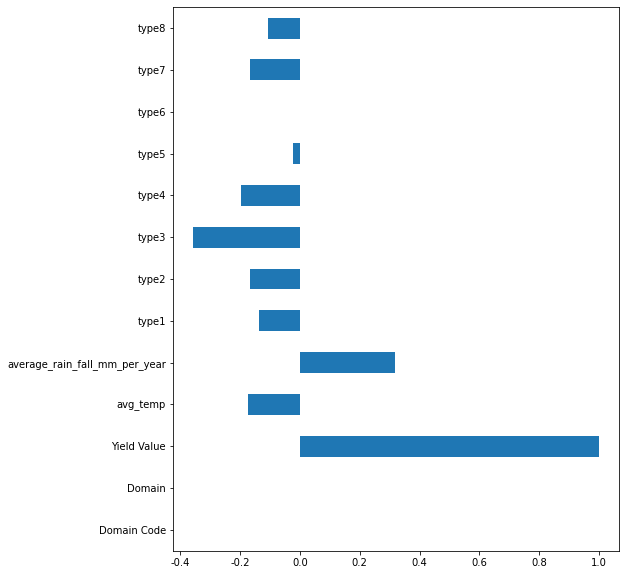

In [79]:
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['SimHei','Times New Roman']

mpl.rcParams['axes.unicode_minus']=False#Negative value display


# correlation between target and features
(dd.corr().loc['Yield Value']     # Calculating the correlation coefficient
.plot(kind='barh', figsize=(8,10)))

In [80]:
X.drop(axis=1,columns=['Domain','Domain Code','type6','type5'],inplace=True)
X

,avg_temp,average_rain_fall_mm_per_year,type1,type2,type3,type4,type7,type8
502,16.80,534.0,278265.8989,418623.0496,118768.83780,15345.59786,418623.0496,4607.012919
503,13.77,534.0,279741.6390,418674.0575,117744.64180,14923.40502,418674.0575,4610.743294
504,13.31,534.0,284766.0927,423080.1082,116837.50670,15293.18335,423080.1082,4603.282544
505,18.03,534.0,289142.2677,423764.9326,113837.51190,15374.99343,423764.9326,3315.528376
506,13.52,534.0,293830.7091,424092.9594,110997.41020,15790.42685,424092.9594,2164.428749
...,...,...,...,...,...,...,...,...
9847,7.88,565.0,325586.6220,452089.7628,100145.05240,25843.83396,452089.7628,111.158986
9848,9.46,565.0,330087.2508,455267.4446,99448.15059,25013.69110,455267.4446,154.711685
9849,9.24,565.0,317063.8437,442172.3752,94169.69931,30113.67143,442172.3752,174.240462
9850,8.82,565.0,269598.4218,384651.7878,87087.76926,27242.47651,384651.7878,53.949494


In [81]:
print(X.dtypes)

avg_temp                         float64
average_rain_fall_mm_per_year    float64
type1                            float64
type2                            float64
type3                            float64
type4                            float64
type7                            float64
type8                            float64
dtype: object


In [82]:
feature_cols = ['temp', 'rainfall', 'plant co2', 'industry co2','ch4','n2O','nf3','pfcs']

In [83]:
_x=dd
_x.drop(axis=1,columns=['type5','Domain','Domain Code','type6',"key4"],inplace=True)
_x

,Yield Value,avg_temp,average_rain_fall_mm_per_year,type1,type2,type3,type4,type7,type8
502,87676.857143,16.80,534.0,278265.8989,418623.0496,118768.83780,15345.59786,418623.0496,4607.012919
503,87854.285714,13.77,534.0,279741.6390,418674.0575,117744.64180,14923.40502,418674.0575,4610.743294
504,88745.571429,13.31,534.0,284766.0927,423080.1082,116837.50670,15293.18335,423080.1082,4603.282544
505,84714.857143,18.03,534.0,289142.2677,423764.9326,113837.51190,15374.99343,423764.9326,3315.528376
506,88062.857143,13.52,534.0,293830.7091,424092.9594,110997.41020,15790.42685,424092.9594,2164.428749
...,...,...,...,...,...,...,...,...,...
9847,45492.666667,7.88,565.0,325586.6220,452089.7628,100145.05240,25843.83396,452089.7628,111.158986
9848,45417.333333,9.46,565.0,330087.2508,455267.4446,99448.15059,25013.69110,455267.4446,154.711685
9849,51494.500000,9.24,565.0,317063.8437,442172.3752,94169.69931,30113.67143,442172.3752,174.240462
9850,52798.166667,8.82,565.0,269598.4218,384651.7878,87087.76926,27242.47651,384651.7878,53.949494


In [84]:
values = _x.values.tolist()
columns = _x.columns.tolist()
spark_X = spark.createDataFrame(values, columns)
spark_X.show()

+------------------+--------+-----------------------------+-----------+-----------+-----------+-----------+-----------+-----------+
|       Yield Value|avg_temp|average_rain_fall_mm_per_year|      type1|      type2|      type3|      type4|      type7|      type8|
+------------------+--------+-----------------------------+-----------+-----------+-----------+-----------+-----------+-----------+
| 87676.85714285714|    16.8|                        534.0|278265.8989|418623.0496|118768.8378|15345.59786|418623.0496|4607.012919|
| 87854.28571428571|   13.77|                        534.0| 279741.639|418674.0575|117744.6418|14923.40502|418674.0575|4610.743294|
| 88745.57142857143|   13.31|                        534.0|284766.0927|423080.1082|116837.5067|15293.18335|423080.1082|4603.282544|
| 84714.85714285714|   18.03|                        534.0|289142.2677|423764.9326|113837.5119|15374.99343|423764.9326|3315.528376|
| 88062.85714285714|   13.52|                        534.0|293830.7091|42409

In [85]:
# def fn(item):
#     return (float(item)) 

# fn = udf(fn, IntegerType())
# spark_X = spark_X.withColumn('label', fn('avg_temp'))
# spark_X.show(100)

spark_X=spark_X.withColumnRenamed("Yield Value","label")
spark_X.show(100)

+------------------+--------+-----------------------------+-----------+-----------+-----------+-----------+-----------+-----------+
|             label|avg_temp|average_rain_fall_mm_per_year|      type1|      type2|      type3|      type4|      type7|      type8|
+------------------+--------+-----------------------------+-----------+-----------+-----------+-----------+-----------+-----------+
| 87676.85714285714|    16.8|                        534.0|278265.8989|418623.0496|118768.8378|15345.59786|418623.0496|4607.012919|
| 87854.28571428571|   13.77|                        534.0| 279741.639|418674.0575|117744.6418|14923.40502|418674.0575|4610.743294|
| 88745.57142857143|   13.31|                        534.0|284766.0927|423080.1082|116837.5067|15293.18335|423080.1082|4603.282544|
| 84714.85714285714|   18.03|                        534.0|289142.2677|423764.9326|113837.5119|15374.99343|423764.9326|3315.528376|
| 88062.85714285714|   13.52|                        534.0|293830.7091|42409

In [86]:
spark_X.printSchema()

root
 |-- label: double (nullable = true)
 |-- avg_temp: double (nullable = true)
 |-- average_rain_fall_mm_per_year: double (nullable = true)
 |-- type1: double (nullable = true)
 |-- type2: double (nullable = true)
 |-- type3: double (nullable = true)
 |-- type4: double (nullable = true)
 |-- type7: double (nullable = true)
 |-- type8: double (nullable = true)



In [87]:
spark_X.columns

['label',
 'avg_temp',
 'average_rain_fall_mm_per_year',
 'type1',
 'type2',
 'type3',
 'type4',
 'type7',
 'type8']

In [88]:
#spark_X = spark_X.drop("label")
#spark_X.columns

In [89]:
feature_X = spark_X.drop("label").columns
feature_X

['avg_temp',
 'average_rain_fall_mm_per_year',
 'type1',
 'type2',
 'type3',
 'type4',
 'type7',
 'type8']

In [90]:
spark_X.columns

['label',
 'avg_temp',
 'average_rain_fall_mm_per_year',
 'type1',
 'type2',
 'type3',
 'type4',
 'type7',
 'type8']

线性回归

In [91]:
#import LinearRegression
from pyspark.ml.regression import LinearRegression
from pyspark.sql.session import SparkSession

In [92]:
#perform transform 
from pyspark.ml.feature import StringIndexer,Bucketizer,OneHotEncoder,VectorAssembler
Vector = VectorAssembler(inputCols=feature_X,outputCol="features")
transform_data = Vector.transform(spark_X)

transform_data = transform_data.select("features","label")
transform_data.printSchema()

root
 |-- features: vector (nullable = true)
 |-- label: double (nullable = true)



In [93]:
transform_data.show()

+--------------------+------------------+
|            features|             label|
+--------------------+------------------+
|[16.8,534.0,27826...| 87676.85714285714|
|[13.77,534.0,2797...| 87854.28571428571|
|[13.31,534.0,2847...| 88745.57142857143|
|[18.03,534.0,2891...| 84714.85714285714|
|[13.52,534.0,2938...| 88062.85714285714|
|[16.95,534.0,3051...|           91639.0|
|[16.12,534.0,3119...|           95378.0|
|[16.48,534.0,3204...|109106.71428571429|
|[20.62,534.0,3343...|114074.85714285714|
|[14.2,534.0,34371...|116291.42857142857|
|[19.07,534.0,3498...|115004.71428571429|
|[12.29,534.0,3576...|122840.28571428571|
|[18.93,534.0,3618...|128765.57142857143|
|[18.87,534.0,3815...|129321.71428571429|
|[18.26,534.0,3855...|123436.42857142857|
|[12.51,534.0,3911...|          121644.0|
|[12.83,534.0,3988...|126176.14285714286|
|[18.78,534.0,4042...|122140.42857142857|
|[20.65,534.0,4084...|117882.42857142857|
|[14.23,534.0,4062...|          125978.0|
+--------------------+------------

In [94]:
#split 
split_data = transform_data.randomSplit([0.7, 0.3])
train_df = split_data[0]
test_df = split_data[1]




## 线性回归

In [95]:
from pyspark.ml.evaluation import RegressionEvaluator
lr=LinearRegression(featuresCol='features',labelCol='label') 
model = lr.fit(train_df)  
model
#forcast
lr_predictions = model.transform(test_df)

#lr_predictions.select('prediction', 'label', 'features').show(5)
lr_predictions.select('prediction', 'label').show(5)
lr_evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = lr_evaluator.evaluate(lr_predictions)
print("LinearRegression Error (RMSE) on test data = %g" % rmse)

22/10/11 02:51:07 WARN Instrumentation: [58ec4e2a] regParam is zero, which might cause numerical instability and overfitting.
22/10/11 02:51:08 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
22/10/11 02:51:08 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
22/10/11 02:51:08 WARN InstanceBuilder$NativeLAPACK: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


+------------------+------------------+
|        prediction|             label|
+------------------+------------------+
| 142359.4643889673|          147923.5|
|  71788.8987087702|           57734.0|
|128059.75739300126|204812.66666666666|
| 139066.1343832394|          163562.5|
|123423.64270753661|         148636.25|
+------------------+------------------+
only showing top 5 rows

LinearRegression Error (RMSE) on test data = 48925.4


In [96]:
list(zip(feature_cols,model.coefficients))

[('temp', -2377.6543734277852),
 ('rainfall', 30.416804284291626),
 ('plant co2', -2.5499462346147856),
 ('industry co2', 3.5967264121921816),
 ('ch4', -2.8310365108211935),
 ('n2O', -2.271637269809138),
 ('nf3', -1.0824208588820197),
 ('pfcs', -6.420864972390437)]

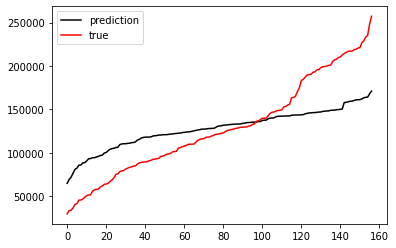

In [97]:
import matplotlib.pyplot as plt 

prediction_li=lr_predictions.select("prediction").toPandas().values.tolist()
label_li=lr_predictions.select("label").toPandas().values.tolist()
plt.plot(range(len(prediction_li)),sorted(prediction_li),c="black",label= "prediction") 
plt.plot(range(len(label_li)),sorted(label_li),c="red",label = "true") 
plt.legend()
plt.show()

## 随机森林算法

In [98]:
from pyspark.ml.regression import RandomForestRegressor

In [99]:
model_df=transform_data.select(['features','label'])  
model_df.show(8000)


+--------------------+------------------+
|            features|             label|
+--------------------+------------------+
|[16.8,534.0,27826...| 87676.85714285714|
|[13.77,534.0,2797...| 87854.28571428571|
|[13.31,534.0,2847...| 88745.57142857143|
|[18.03,534.0,2891...| 84714.85714285714|
|[13.52,534.0,2938...| 88062.85714285714|
|[16.95,534.0,3051...|           91639.0|
|[16.12,534.0,3119...|           95378.0|
|[16.48,534.0,3204...|109106.71428571429|
|[20.62,534.0,3343...|114074.85714285714|
|[14.2,534.0,34371...|116291.42857142857|
|[19.07,534.0,3498...|115004.71428571429|
|[12.29,534.0,3576...|122840.28571428571|
|[18.93,534.0,3618...|128765.57142857143|
|[18.87,534.0,3815...|129321.71428571429|
|[18.26,534.0,3855...|123436.42857142857|
|[12.51,534.0,3911...|          121644.0|
|[12.83,534.0,3988...|126176.14285714286|
|[18.78,534.0,4042...|122140.42857142857|
|[20.65,534.0,4084...|117882.42857142857|
|[14.23,534.0,4062...|          125978.0|
|[19.88,534.0,4037...|127280.71428

In [100]:
rf_classifier=RandomForestRegressor(labelCol='label',numTrees=100).fit(model_df) 

In [101]:
rf_predictions=rf_classifier.transform(model_df)
rf_predictions.select('prediction', 'label', 'features').show(5)
rf_evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = rf_evaluator.evaluate(rf_predictions)
print("RandomForestRegressor Error (RMSE) on test data = %g" % rmse)

+-----------------+-----------------+--------------------+
|       prediction|            label|            features|
+-----------------+-----------------+--------------------+
|88197.14321193431|87676.85714285714|[16.8,534.0,27826...|
|87513.46444480875|87854.28571428571|[13.77,534.0,2797...|
|88403.52851098166|88745.57142857143|[13.31,534.0,2847...|
|89406.00649836831|84714.85714285714|[18.03,534.0,2891...|
|  89073.539735211|88062.85714285714|[13.52,534.0,2938...|
+-----------------+-----------------+--------------------+
only showing top 5 rows

RandomForestRegressor Error (RMSE) on test data = 13222.3


In [102]:
list(zip(feature_cols,rf_classifier.featureImportances))

[('temp', 0.091242765948933),
 ('rainfall', 0.2810636204641132),
 ('plant co2', 0.11000578728587065),
 ('industry co2', 0.07483085939272435),
 ('ch4', 0.16796994846308214),
 ('n2O', 0.1670637332764907),
 ('nf3', 0.0740238087030304),
 ('pfcs', 0.033799476465755374)]

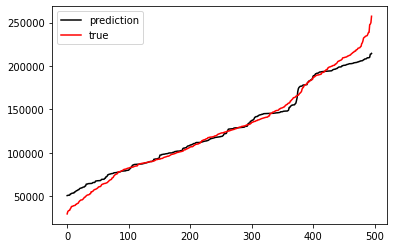

In [103]:
import matplotlib.pyplot as plt 

prediction_li=rf_predictions.select("prediction").toPandas().values.tolist()
label_li=rf_predictions.select("label").toPandas().values.tolist()
plt.plot(range(len(prediction_li)),sorted(prediction_li),c="black",label= "prediction") 
plt.plot(range(len(label_li)),sorted(label_li),c="red",label = "true") 
plt.legend()
plt.show()

## 决策树算法

In [104]:
from pyspark.ml.regression import DecisionTreeRegressor
 

In [105]:
train_df

DataFrame[features: vector, label: double]

In [106]:
from pyspark.ml.regression import DecisionTreeRegressor


dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'label')
dt_model = dt.fit(train_df)
dt_predictions = dt_model.transform(test_df)
dt_predictions.select('prediction', 'label', 'features').show(5)
dt_evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = dt_evaluator.evaluate(dt_predictions)
print("DecisionTreeRegressor Error (RMSE) on test data = %g" % rmse)



+------------------+------------------+--------------------+
|        prediction|             label|            features|
+------------------+------------------+--------------------+
|        119350.125|          147923.5|[4.36,536.0,63828...|
|  73132.4595959596|           57734.0|[4.66,537.0,51061...|
|        148756.875|204812.66666666666|[5.43,700.0,88634...|
|143075.33333333334|          163562.5|[5.49,536.0,55635...|
|        148756.875|         148636.25|[5.59,700.0,91563...|
+------------------+------------------+--------------------+
only showing top 5 rows

DecisionTreeRegressor Error (RMSE) on test data = 17391.9


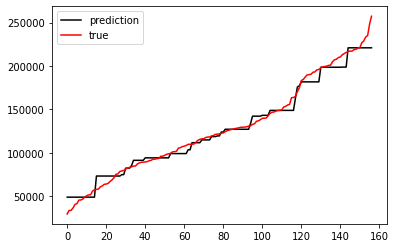

In [107]:
import matplotlib.pyplot as plt 

prediction_li=dt_predictions.select("prediction").toPandas().values.tolist()
label_li=dt_predictions.select("label").toPandas().values.tolist()
plt.plot(range(len(prediction_li)),sorted(prediction_li),c="black",label= "prediction") 
plt.plot(range(len(label_li)),sorted(label_li),c="red",label = "true") 
plt.legend()
plt.show()

## 梯度回归树（GBDT）

In [108]:
from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(featuresCol = 'features', labelCol = 'label', maxIter=10)
gbt_model = gbt.fit(train_df)
gbt_predictions = gbt_model.transform(test_df)
gbt_predictions.select('prediction', 'label', 'features').show(5)

gbt_evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = gbt_evaluator.evaluate(gbt_predictions)
print("GBTRegressor Error (RMSE) on test data = %g" % rmse)

+------------------+------------------+--------------------+
|        prediction|             label|            features|
+------------------+------------------+--------------------+
|122908.57358839827|          147923.5|[4.36,536.0,63828...|
| 60907.44902349181|           57734.0|[4.66,537.0,51061...|
|143094.99512349887|204812.66666666666|[5.43,700.0,88634...|
|142064.00080637453|          163562.5|[5.49,536.0,55635...|
|143874.22493330773|         148636.25|[5.59,700.0,91563...|
+------------------+------------------+--------------------+
only showing top 5 rows

GBTRegressor Error (RMSE) on test data = 16332.5


In [109]:
list(zip(feature_cols,gbt_model.featureImportances))

[('temp', 0.10585661975940466),
 ('rainfall', 0.22977404414275046),
 ('plant co2', 0.23097224963045448),
 ('industry co2', 0.02164102871245733),
 ('ch4', 0.20691115859174347),
 ('n2O', 0.10982021702206904),
 ('nf3', 0.010878147423651424),
 ('pfcs', 0.08414653471746913)]

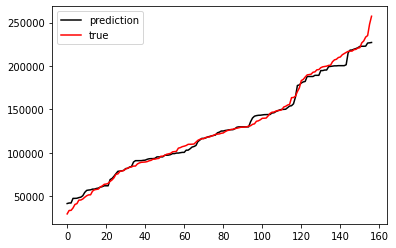

In [110]:
import matplotlib.pyplot as plt 

prediction_li=gbt_predictions.select("prediction").toPandas().values.tolist()
label_li=gbt_predictions.select("label").toPandas().values.tolist()
plt.plot(range(len(prediction_li)),sorted(prediction_li),c="black",label= "prediction") 
plt.plot(range(len(label_li)),sorted(label_li),c="red",label = "true") 
plt.legend()
plt.show()